Skillfactory > DA > 9.10. PROJECT. Determining the number of bots on the site

# INDEPENDENT WORK

Exercise:

1. Estimate the number of bots that visit our site and their share of the total traffic?
2. Determine what sources and at what daily time robots most often come from?


Note. Robots can be search engine spiders that index blog content, or various content parsers and aggregators. Yandex.Metrica allows you to find these robots and shows them in a separate parameter ym:s:isRobot, and also counts their share in the special metric ym:s:robotPercentage.


### Notes:
* The answer must be in the form of an ipynb file.
* The ipynb file should start and run without having to change the order of steps. That is, when you click the Restart Kernel & Re-run the whole notebook button, the laptop should run without errors and give the result of checking the second hypothesis at the end.
* The result of the assignment is a written algorithm that performs calculations and displays data, on the basis of which it is possible to confirm or refute the hypothesis.
* Mandatory presence of outputs in cell format with Markdown.
* It will be a big plus (but this is not a prerequisite) if during the algorithm comments are given to the code (in the form of Python comments or in Markdown markup in Jupyter Notebook) describing the purpose of the variables and expressions created.

### Note to reviewer:
- to check the project, in the parameters (params = ... > token = ... instead of MY TOKEN, insert your working Yandex Metrica token)

### Data collection

In [1]:
# Importing required working libraries:

import pandas as pd
import numpy as np # imported for "if needed" cases
import json
import requests
from pprint import pprint

In [2]:
# Defining query parameters, indicating final technical names of the metrics:

params = {'metrics':'ym:s:visits,ym:s:robotPercentage',
         'dimensions':'ym:s:lastsignTrafficSource,ym:s:hour',
         'date1':'2020-09-01',
         'date2':'2020-09-30',
         'ids':30177909,
         'accuracy': 'full', 
         'limit': 100000}

# Setting authorization token to the 'token' variable:
token = 'MY TOKEN' 
# Creating a headers dictionary that will contain the HTTP header parameters:
headers = {'Authorization': 'OAuth' + token}

In [3]:
# By using the 'requests' library, we make an http request to Yandex.Metrics API and get our data:
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
# We make sure that the request was made correctly and the API sent a response - a 200 code was received:
print(response.status_code)

403


In [4]:
# Let's write the response data to the metrica_data variable:
metrika_data = response.json()

In [5]:
# Let's display the statistics of the first 5 dictionaries that contain 2 keys:
## dimensions - grouping values that we specified in the request,
## metrics - metrics values that are specified in the request
pprint(metrika_data['data'][0:5])

KeyError: 'data'

### Data transformation:

In [6]:
# Creating metrica_df dataframe from statistic data metrica_data['data']
metrika_df = pd.DataFrame(metrika_data['data'])
display(metrika_df)

,dimensions,metrics
0,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[251.0, 24.70119522]"
1,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[240.0, 26.25]"
2,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[228.0, 25.87719298]"
3,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[227.0, 28.1938326]"
4,"[{'icon_id': '2', 'icon_type': 'traffic-source...","[225.0, 24.88888889]"
...,...,...
102,"[{'icon_id': '8', 'icon_type': 'traffic-source...","[1.0, 0.0]"
103,"[{'icon_id': '8', 'icon_type': 'traffic-source...","[1.0, 0.0]"
104,"[{'icon_id': '8', 'icon_type': 'traffic-source...","[1.0, 0.0]"
105,"[{'icon_id': '9', 'icon_type': 'traffic-source...","[1.0, 0.0]"


In [7]:
# Converting data into a convenient working form
# - let's get rid of nested dictionaries by using the getMetrikaDataInListOfDicts function:
def getMetrikaDataInListOfDicts(metrika_data):
    list_of_dicts = []
    dimensions_list = metrika_data['query']['dimensions']
    metrics_list = metrika_data['query']['metrics']
    for data_item in metrika_data['data']:
        d = {}
        for i, dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i, metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts

In [8]:
# Creating new variable 'metrica_list_of_dicts' - applying the function to metrika_data:
metrika_list_of_dicts = getMetrikaDataInListOfDicts(metrika_data)

In [9]:
# Creating a new dataframe from the resulting structure:
metrika_df2 = pd.DataFrame(metrika_list_of_dicts)
display(metrika_df2.head(10))

,ym:s:lastsignTrafficSource,ym:s:hour,ym:s:visits,ym:s:robotPercentage
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889
5,Search engine traffic,14:00,225.0,25.777778
6,Search engine traffic,17:00,209.0,26.315789
7,Search engine traffic,10:00,186.0,19.354839
8,Search engine traffic,21:00,166.0,17.469880
9,Search engine traffic,19:00,161.0,23.602484


In [10]:
# Renaming columns to match with their corresponding values:
# The column called 'RobotPercentage' contains the percentage of visits by robots in each visit row:
metrika_df2.columns = ['Source','Time','Visits','RobotPercentage']
display(metrika_df2)

,Source,Time,Visits,RobotPercentage
0,Search engine traffic,16:00,251.0,24.701195
1,Search engine traffic,15:00,240.0,26.250000
2,Search engine traffic,11:00,228.0,25.877193
3,Search engine traffic,13:00,227.0,28.193833
4,Search engine traffic,12:00,225.0,24.888889
...,...,...,...,...
102,Social network traffic,02:00,1.0,0.000000
103,Social network traffic,04:00,1.0,0.000000
104,Social network traffic,10:00,1.0,0.000000
105,Recommendation system traffic,08:00,1.0,0.000000


In [11]:
# Adding two additional columns to calculate separately the number of visits by humans - Humans
# and the number of visits by robots - Robots:
metrika_df2['Robots'] = metrika_df2['Visits']*(metrika_df2['RobotPercentage']/100)
metrika_df2['Humans'] = metrika_df2['Visits']-metrika_df2['Robots']
metrika_df2

,Source,Time,Visits,RobotPercentage,Robots,People
0,Search engine traffic,16:00,251.0,24.701195,62.0,189.0
1,Search engine traffic,15:00,240.0,26.250000,63.0,177.0
2,Search engine traffic,11:00,228.0,25.877193,59.0,169.0
3,Search engine traffic,13:00,227.0,28.193833,64.0,163.0
4,Search engine traffic,12:00,225.0,24.888889,56.0,169.0
...,...,...,...,...,...,...
102,Social network traffic,02:00,1.0,0.000000,0.0,1.0
103,Social network traffic,04:00,1.0,0.000000,0.0,1.0
104,Social network traffic,10:00,1.0,0.000000,0.0,1.0
105,Recommendation system traffic,08:00,1.0,0.000000,0.0,1.0


Table above displays total number of visits by humans and robots (Visits), individual number of visits by humans (Humans) and robots (Robots), share of robots from all traffic (RobotPercentage), source of transition and specific time of the day (Time) at which humans and robots visit the web page.

In [12]:
# Creating a pivot table of visits by humans and robots, grouped by traffic source:
pivot_df = metrika_df2.pivot_table(
    index=['Source'],
    values=['Robots', 'Humans'],
    aggfunc='sum',
    fill_value=0) # replacing gaps with "0" value
pivot_df

,People,Robots
Source,,
Cached page traffic,5,1
Direct traffic,580,177
Internal traffic,7,3
Link traffic,95,31
Recommendation system traffic,2,0
Search engine traffic,2595,739
Social network traffic,69,11


### Conclusion 1:
Assuming that data is collected and converted correctly, we see that the total number of robots - bots that visit our site from all type of sources - 962 visits, which is several times (~ 3-5) less than the total number of visits made by humans - 3353 visits. For example, according to the Direct traffic source: the total number of visits by humans - 580, by robots - 177; a similar proportion is observed for other traffic sources. The share of robots in all traffic (4315 visits - 100%) is 22.29%.

In [13]:
# Create a new pivot table of visits by robots, grouped by traffic source in terms of daily time:
pivot_df2 = metrika_df2.pivot_table(
    index = 'Source',
    columns = 'Time',
    values='Robots',
    aggfunc='sum',
    fill_value=0) # replacing gaps with "0" value
pivot_df2

Time,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
Source,,,,,,,,,,,,,,,,,,,,,
Cached page traffic,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Direct traffic,2,4,2,2,3,3,3,5,5,12,...,14,6,8,9,9,10,8,13,6,8
Internal traffic,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Link traffic,0,0,0,1,0,0,2,1,1,1,...,2,1,3,2,1,0,2,0,1,1
Recommendation system traffic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Search engine traffic,17,8,5,3,3,1,3,6,29,36,...,58,63,62,55,31,38,26,29,30,21
Social network traffic,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,1,3,0


In [14]:
pivot_df2.T

Source,Cached page traffic,Direct traffic,Internal traffic,Link traffic,Recommendation system traffic,Search engine traffic,Social network traffic
Time,,,,,,,
00:00,0,2,0,0,0,17,0
01:00,1,4,0,0,0,8,0
02:00,0,2,0,0,0,5,0
03:00,0,2,0,1,0,3,0
04:00,0,3,0,0,0,3,0
05:00,0,3,0,0,0,1,0
06:00,0,3,0,2,0,3,0
07:00,0,5,0,1,0,6,0
08:00,0,5,0,1,0,29,1


In [15]:
# Counting the number of visits by traffic source (Source) - pivot df2:
display(pivot_df2.T['Cached page traffic'].sum())
display(pivot_df2.T['Direct traffic'].sum())
display(pivot_df2.T['Internal traffic'].sum())
display(pivot_df2.T['Link traffic'].sum())
display(pivot_df2.T['Recommendation system traffic'].sum())
display(pivot_df2.T['Search engine traffic'].sum())
display(pivot_df2.T['Social network traffic'].sum())

1

177

3

31

0

739

11

In [16]:
# Creating an additional pivot_df3 dataset to count the number of visits at different times of the day (Time):
pivot_df3 = metrika_df2.pivot_table(
    index = 'Time',
    columns = 'Source',
    values='Robots',
    aggfunc='sum',
    fill_value=0) # replacing gaps with "0" value
pivot_df3

Source,Cached page traffic,Direct traffic,Internal traffic,Link traffic,Recommendation system traffic,Search engine traffic,Social network traffic
Time,,,,,,,
00:00,0,2,0,0,0,17,0
01:00,1,4,0,0,0,8,0
02:00,0,2,0,0,0,5,0
03:00,0,2,0,1,0,3,0
04:00,0,3,0,0,0,3,0
05:00,0,3,0,0,0,1,0
06:00,0,3,0,2,0,3,0
07:00,0,5,0,1,0,6,0
08:00,0,5,0,1,0,29,1


In [17]:
# Counting the number of visits at different times of the day (Time) - pivot_df3:

display(pivot_df3.T['00:00'].sum())
display(pivot_df3.T['01:00'].sum())
display(pivot_df3.T['02:00'].sum())
display(pivot_df3.T['03:00'].sum())
display(pivot_df3.T['04:00'].sum())
display(pivot_df3.T['05:00'].sum())
display(pivot_df3.T['06:00'].sum())
display(pivot_df3.T['07:00'].sum())
display(pivot_df3.T['08:00'].sum())
display(pivot_df3.T['09:00'].sum())
display(pivot_df3.T['10:00'].sum())
display(pivot_df3.T['11:00'].sum())
display(pivot_df3.T['12:00'].sum())
display(pivot_df3.T['13:00'].sum())
display(pivot_df3.T['14:00'].sum())
display(pivot_df3.T['15:00'].sum())
display(pivot_df3.T['16:00'].sum())
display(pivot_df3.T['17:00'].sum())
display(pivot_df3.T['18:00'].sum())
display(pivot_df3.T['19:00'].sum())
display(pivot_df3.T['20:00'].sum())
display(pivot_df3.T['21:00'].sum())
display(pivot_df3.T['22:00'].sum())
display(pivot_df3.T['23:00'].sum())

19

13

7

6

6

4

8

12

36

51

51

70

75

80

74

71

75

66

41

48

36

43

40

30

### Conclusion 2:
Assuming that data is collected and converted correctly, the above table displays the number of visits by robots - bots to our site from different sources at different times of the day: most often the site is visited from the following sources: Search engine traffic - 739; Direct traffic - 177; much less for Link traffic - 31 and at the following times of the day: 13:00 - 80; 12:00, 16:00 - 75; 14:00 - 74 visits, respectively.

### Visualization

In [18]:
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True) 
cf.go_offline()

In [19]:
%pip install plotly

Text(0.5, 1.0, 'Визиты людей (син.), роботов (оран.), Link')

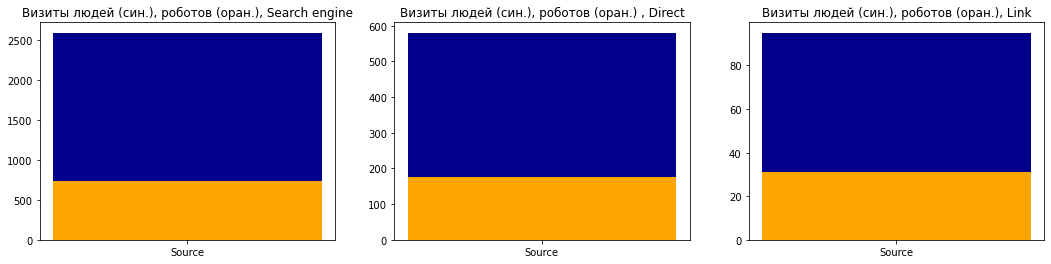

In [20]:
# Visualizing the ratio of visits by humans and robots on the site according to three sources mostly visited by robots:
fig, axes = plt.subplots(1, 3, figsize = (18, 4))
axes[0].bar(x = 'Source', height = pivot_df['Humans']['Search engine traffic'], color = 'darkblue')
axes[0].bar(x = 'Source', height = pivot_df['Robots']['Search engine traffic'], color = 'orange')
axes[0].set_title('Visits by humans (blue), robots (orange), Search engine')

axes[1].bar(x = 'Source', height = pivot_df['Humans']['Direct traffic'], color = 'darkblue')
axes[1].bar(x = 'Source', height = pivot_df['Robots']['Direct traffic'], color = 'orange')
axes[1].set_title('Visits by humans (blue), robots (orange) , Direct')

axes[2].bar(x = 'Source', height = pivot_df['Humans']['Link traffic'], color = 'darkblue')
axes[2].bar(x = 'Source', height = pivot_df['Robots']['Link traffic'], color = 'orange')
axes[2].set_title('Visits by humans (blue), robots (orange), Link')

Text(0, 0.5, 'Количество визитов людей, в %')

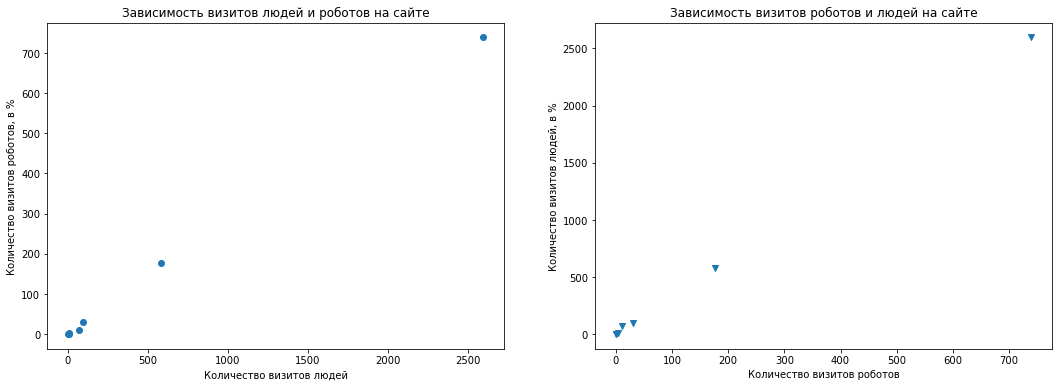

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6)) 
axes[0].scatter(x = pivot_df['Humans'], y = pivot_df['Robots'], marker = 'o')
axes[0].set_title('Dependence of human and robot visits on the site')
axes[0].set_xlabel('Number of human visits')
axes[0].set_ylabel('Number of robot visits, in %')

axes[1].scatter(x = pivot_df['Robots'], y = pivot_df['Humans'], marker = 'v')
axes[1].set_title('Dependence of robot and human visits on the site')
axes[1].set_xlabel('Number of robot visitors')
axes[1].set_ylabel('Number of human visitors, in %')

As we can see on the graph above, there is a direct dependence of the number of visits by robots from the number of visits by humans:
- the more humans visit the site, the higher number of visits by robots is observed, respectively


Note: we make an assumption that the data we have collected is sufficient to determine the dependencies between the variables.

In [22]:
pivot_df.rename(columns = {'index': 'Source'})
pivot_df.reset_index(inplace=True)
pivot_df

,Source,People,Robots
0,Cached page traffic,5,1
1,Direct traffic,580,177
2,Internal traffic,7,3
3,Link traffic,95,31
4,Recommendation system traffic,2,0
5,Search engine traffic,2595,739
6,Social network traffic,69,11


Text(0, 0.5, 'Количество визитов роботов')

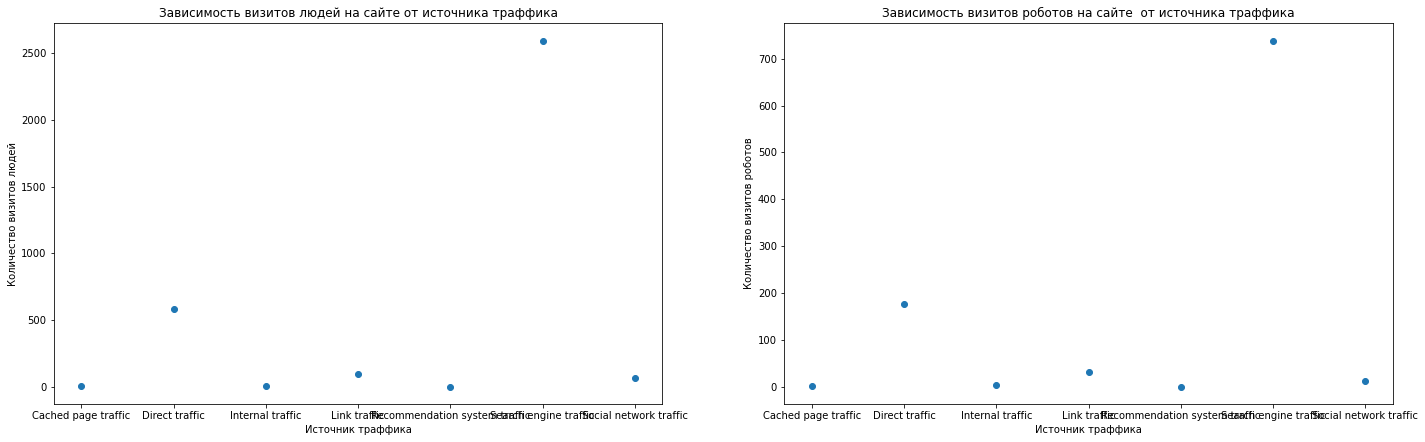

In [23]:
# Visualization of dependencies of visits by humans from traffic sources and visits by robots from traffic sources:
fig, axes = plt.subplots(1, 2, figsize = (24, 7)) 
axes[0].scatter(x = pivot_df['Source'], y = pivot_df['Humans'], marker = 'o')

axes[1].scatter(x = pivot_df['Source'], y = pivot_df['Robots'], marker = 'o')

axes[0].set_title('Dependence of human visits on the site from traffic source')
axes[0].set_xlabel('Traffic source')
axes[0].set_ylabel('Number of visit by humans')
axes[1].set_title('Dependence of robot visits on the site from traffic source')
axes[1].set_xlabel('Traffic source')
axes[1].set_ylabel('Number of visit by robots')

Как мы видим, зависимость визитов роботов от источников траффика полностью коррелирует с зависимостью визитов людей от источников траффика.
As we can see, the dependence of robot visits from traffic sources fully correlates with the dependence of human visits from traffic sources.

In [24]:
pivot_df['Humans']

0       5
1     580
2       7
3      95
4       2
5    2595
6      69
Name: People, dtype: int64

In [25]:
pivot_df['Robots']

0      1
1    177
2      3
3     31
4      0
5    739
6     11
Name: Robots, dtype: int64

In [26]:
# Let's visualize the number of visits by robots (bots) for each traffic source:
pivot_df.iplot(kind = 'bubble', x = 'Robots', y = 'Source', size = 'Humans', color = 'darkred')

In [27]:
# Additionally, let's visualize the number of visits by robots (Robots) at different times of the day (Time),
# in terms of the traffic source (Source):
fig = px.scatter(metrika_df2, x='Time', y='Source', 
                size='Robots', hover_name='Robots',
                color='Source', size_max=50
                )
fig.show()

### Conclusion 3 (based on visualizations):
Based on the results of our visualizations, visits by robots to the website most often come from the following traffic source:
- Search engine traffic: 739 visits, which is ~76.82% of all robot visits from all traffic sources or ~22.17% of all robot and human visits only for this particular traffic source (3334 - 100%);
- Direct traffic: 177 visits, which is ~18.40% of all robot visits from all traffic sources or ~23.38% of all robot and human visits only for this particular traffic source (757 - 100%);
- Link traffic: 31 visits, which is ~3.22% of all visits of robots from all traffic sources or ~24.60% of all visits of robots and humans only for this particular traffic source (126 - 100%).